# ST2 Viral Propagation - An introduction to Random Graphs.

## Erdos-Renyi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import igraph as ig

In [2]:
g1 = ig.Graph()

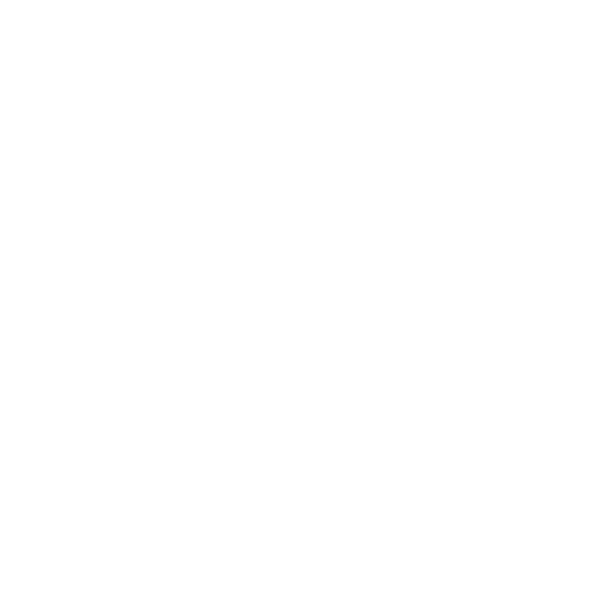

In [3]:
ig.plot(g1)

In [4]:
N=10

In [5]:
g1.add_vertices(N)

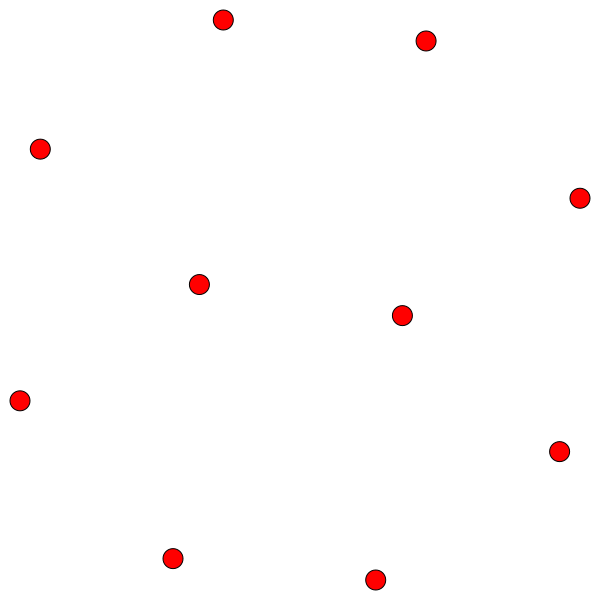

In [6]:
ig.plot(g1)

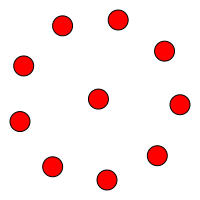

In [7]:
ig.plot(g1,bbox=(200,200))

In [8]:
help(ig.plot)

Help on function plot in module igraph.drawing:

plot(obj, target=None, bbox=(0, 0, 600, 600), *args, **kwds)
    Plots the given object to the given target.
    
    Positional and keyword arguments not explicitly mentioned here will be
    passed down to the C{__plot__} method of the object being plotted.
    Since you are most likely interested in the keyword arguments available
    for graph plots, see L{Graph.__plot__} as well.
    
    @param obj: the object to be plotted
    @param target: the target where the object should be plotted. It can be one
      of the following types:
    
        - C{matplotib.axes.Axes} -- a matplotlib/pyplot axes in which the
          graph will be plotted. Drawing is delegated to the chosen matplotlib
          backend, and you can use interactive backends and matplotlib
          functions to save to file as well.
    
        - C{string} -- a file with the given name will be created and the plot
          will be stored there. If you are using 

In [9]:
for i in range(N):
    for j in range(i):
        if rd.randint(0,1) == 1:
            g1.add_edges([(i,j)])

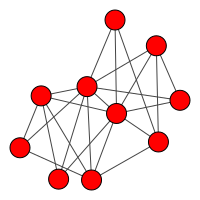

In [10]:
ig.plot(g1,bbox=(200,200))

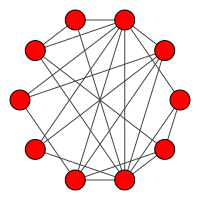

In [11]:
ig.plot(g1,bbox=(200,200),layout='circle')

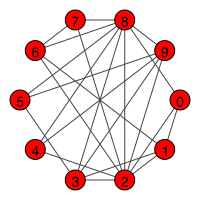

In [12]:
ig.plot(g1,bbox=(200,200),layout='circle',vertex_label=range(N))

In [13]:
g2 = ig.Graph.Erdos_Renyi(N,0.5)

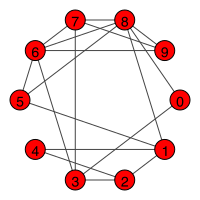

In [14]:
ig.plot(g2,bbox=(200,200),layout='circle',vertex_label=range(N))

In [15]:
g3 = ig.Graph.Erdos_Renyi(1000,0.05)

In [16]:
ig.plot(g3,bbox=(300,300))

(array([ 1.,  1.,  3.,  3.,  4.,  8.,  3.,  0., 12., 15., 17., 21., 18.,
        21.,  0., 42., 40., 53., 41., 51., 43.,  0., 43., 62., 56., 42.,
        60., 46.,  0., 40., 48., 38., 36., 30., 22.,  0., 18., 11., 10.,
         7., 12.,  9.,  0.,  2.,  3.,  3.,  1.,  2.,  1.,  1.]),
 array([30.  , 30.86, 31.72, 32.58, 33.44, 34.3 , 35.16, 36.02, 36.88,
        37.74, 38.6 , 39.46, 40.32, 41.18, 42.04, 42.9 , 43.76, 44.62,
        45.48, 46.34, 47.2 , 48.06, 48.92, 49.78, 50.64, 51.5 , 52.36,
        53.22, 54.08, 54.94, 55.8 , 56.66, 57.52, 58.38, 59.24, 60.1 ,
        60.96, 61.82, 62.68, 63.54, 64.4 , 65.26, 66.12, 66.98, 67.84,
        68.7 , 69.56, 70.42, 71.28, 72.14, 73.  ]),
 <BarContainer object of 50 artists>)

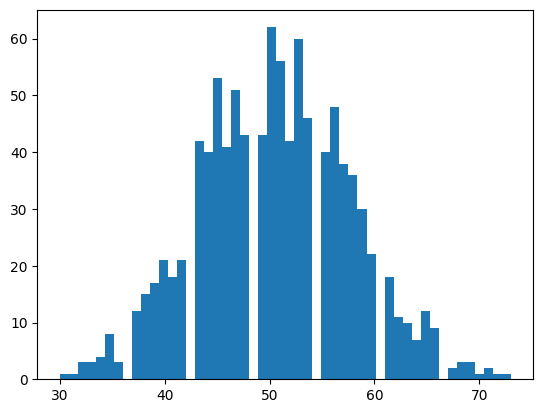

In [17]:
plt.hist(g3.degree(),bins=50)

In [18]:
g4 = ig.Graph.Erdos_Renyi(10000,0.05)

(array([  1.,   0.,   0.,   3.,   4.,   1.,   4.,  14.,  19.,  34.,  52.,
         35.,  83.,  88., 177., 157., 212., 336., 280., 354., 366., 598.,
        528., 528., 554., 702., 548., 548., 674., 488., 435., 365., 441.,
        284., 257., 259., 144., 119.,  90.,  65.,  46.,  27.,  33.,  19.,
          8.,   6.,   6.,   4.,   1.,   3.]),
 array([415.  , 418.28, 421.56, 424.84, 428.12, 431.4 , 434.68, 437.96,
        441.24, 444.52, 447.8 , 451.08, 454.36, 457.64, 460.92, 464.2 ,
        467.48, 470.76, 474.04, 477.32, 480.6 , 483.88, 487.16, 490.44,
        493.72, 497.  , 500.28, 503.56, 506.84, 510.12, 513.4 , 516.68,
        519.96, 523.24, 526.52, 529.8 , 533.08, 536.36, 539.64, 542.92,
        546.2 , 549.48, 552.76, 556.04, 559.32, 562.6 , 565.88, 569.16,
        572.44, 575.72, 579.  ]),
 <BarContainer object of 50 artists>)

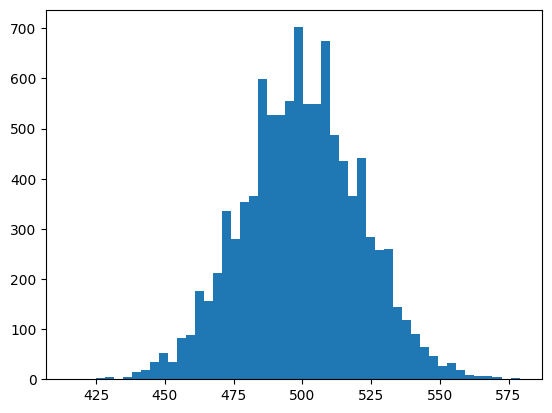

In [19]:
plt.hist(g4.degree(),bins=50)

## Barbesi-Albert

In [20]:
n0 = 4
m0 = 4

t = 0
ba = ig.Graph.Erdos_Renyi(n0,m=m0)

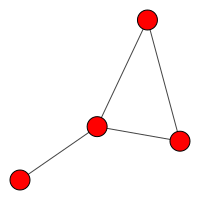

In [22]:
ig.plot(ba,bbox=(200,200))

In [23]:
m=50

In [24]:
def iteration():

    global t, n0, m, ba
    
    vertices_to_chose_from = ba.vs.indices
    k_total = sum([ba.degree(i) for i in vertices_to_chose_from])

    ba.add_vertices(1)
    new_vertex = n0+t
    connections  = 0
    
    while connections < min(m,n0+t):
    
        vertex = rd.choice(vertices_to_chose_from)
        k_vertex = ba.degree(vertex)
    
        if np.random.uniform() < k_vertex / k_total :
            ba.add_edges([(new_vertex,vertex)])
            vertices_to_chose_from.remove(vertex)
            connections = connections + 1

    t = t+1

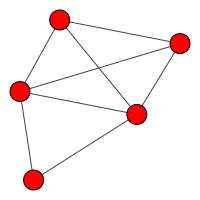

In [25]:
iteration()
ig.plot(ba,bbox=(200,200))